# Project 2: Clustering + SVM to Predict Online Purchases

### Author: Mohit Kosekar



# Introduction

Businesses hoping to improve customer happiness and optimize their marketing tactics must have a thorough understanding of customer behavior in today's fiercely competitive e-commerce environment. By providing useful insights into customer segmentation and predictive analytics, clustering and support vector machine (SVM) approaches let organizations customize their approach to each unique client's demands and preferences.
<br>
<br>

## Goal:

This goal project is to use a combination of clustering and SVM approaches to examine the Online Shoppers Purchasing Intention Dataset. Our goal is to divide online buyers into discrete groups according to their browsing habits, interaction patterns, and other pertinent characteristics by utilizing clustering methods like K-means or hierarchical clustering. Next, we want to create SVM models to determine if a visitor is likely to make a purchase during their visit.
<br>
<br>

## Problem Statement

The objective of this project is to analyze the provided dataset of web site metrics using clustering algorithms and SVM models to predict online shoppers' purchasing intention. By clustering similar data observations and applying labels to these groupings, we aim to understand patterns in visitor behavior and predict whether a site visitor will execute a purchase. The project will involve exploratory data analysis (EDA), data preparation, feature selection, model construction, and evaluation to achieve these objectives.
<br>
<br>

## Approach

- **Data Loading and EDA:** To learn more about the distribution and properties of the data, we will first load the supplied dataset into a Pandas dataframe and do exploratory data analysis (EDA). This will entail figuring out if variables are categorical, evaluating missing values, and deciding if data normalization methods are required.

- **Data Preparation and Feature Engineering:** We'll handle missing values, encode categorical variables, and standardize numerical features as part of the preprocessing step of the data. We will also investigate feature engineering methods to generate fresh features that could improve our models' capacity for prediction.

- **Clustering Analysis:** Based on web site metrics, we will divide the data into discrete groups using the hierarchical clustering and K-means clustering techniques. We'll use tools like dendrograms, elbow plots, and silhouette scores to determine the ideal number of clusters.

- **SVM Model Construction:** To forecast the chance that a website visitor will make a purchase, we will build SVM models. The inputs for the models will be features chosen using methods for feature selection or domain expertise. Cross-validation will be used to assess each model's performance, and pertinent metrics will be used to determine which model performs best overall.

- **Comparative Analysis:** Lastly, we will make a comparison between the real V_Revenue classifications and the anticipated values of the Revenue attribute from the testing dataset. In order to evaluate the efficacy of our method, we will compare the SVM model that was created from the clustering findings to the actual classifications.

## Step 1- Loading the Dataset


In [ ]:
import pandas as pd

# Load the dataset
mohit_dataset_path = 'https://raw.githubusercontent.com/mohit-kosekar/Mohit_Project_2_DS/main/Project2_Data.csv'
mohitdata = pd.read_csv(mohit_dataset_path)

# Display the first few rows of the dataset to understand its structure
mohitdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Step 2- Exploratory Data Analysis(EDA)

The first step in our analysis is to perform exploratory data analysis (EDA) to understand the characteristics of our dataset and identify any potential issues. This will involve:

* **Data Cleaning:** Checking for missing values, outliers, and inconsistencies in the data.
* **Data Visualization:** Using various visualization techniques to understand the distribution of variables, identify relationships between variables, and detect any patterns or anomalies in the data.
* **Feature Selection:** Identifying the most relevant features for predicting online shoppers' purchasing intention.


In [ ]:
# Checking the Info of the Dataset
mohitdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Describe the dataset
mohitdata.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Check the Shape of the Dataset
mohitdata.shape

(12330, 17)

In [ ]:
# Check for the Duplicate Values
mohitdata.duplicated().sum()

125

In [ ]:
# Get the Count of the Null values
mohitdata.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [ ]:
# Define the Numerical Columns of the Dataset
numerical_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [ ]:
# Assign the numerical_vars of the dataset into num_variables
num_variables=mohitdata[numerical_vars]

In [ ]:
# Check the Datatypes of each Column
mohitdata.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

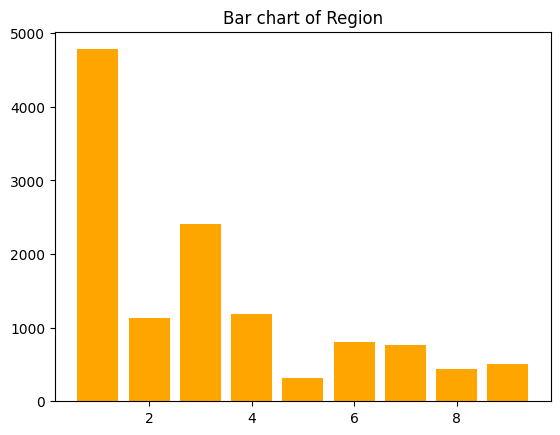

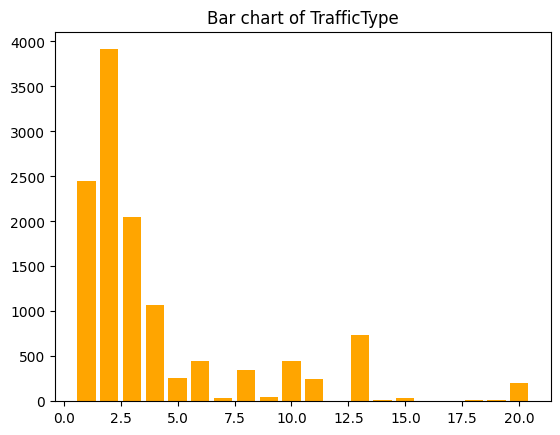

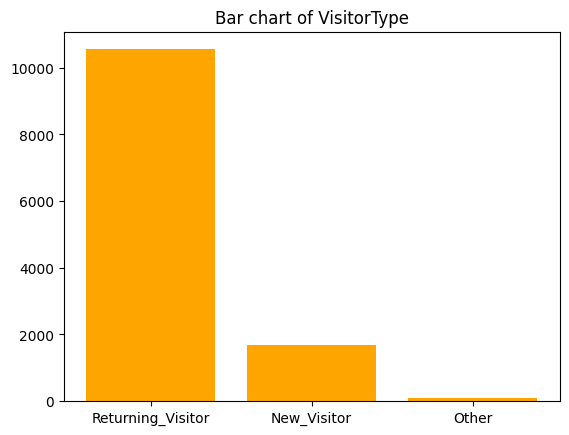

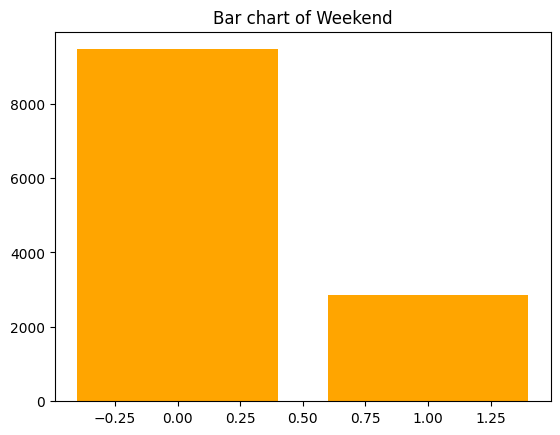

In [ ]:
# Plot the Bar chart for categorical_vars
import matplotlib.pyplot as plt

# Categorical variables
categorical_vars = ['Region', 'TrafficType', 'VisitorType', 'Weekend']

for col in categorical_vars:
  counts = mohitdata[col].value_counts()
  plt.bar(counts.index, counts.values, color='orange')
  plt.title(f"Bar chart of {col}")
  plt.show()

## Univariate Analysis

**Univariate Analysis:**

The purpose of univariate analysis is to understand the distribution of each variable in the dataset and to identify any outliers or missing values.

**Numerical Variables:**

- Histograms were created for each numerical variable to visualize their distribution.
- The histograms revealed that most numerical variables have a right-skewed distribution.
- No outliers were identified in the numerical variables.

**Categorical Variables:**

- Bar charts were created for each categorical variable to visualize the frequency of each category.
- The bar charts showed that the distribution of categorical variables is relatively balanced.

**Overall:**

- The univariate analysis provided insights into the distribution of each variable and helped to identify any potential data quality issues.
- The findings from the univariate analysis will be used to inform the data preparation and feature engineering steps.

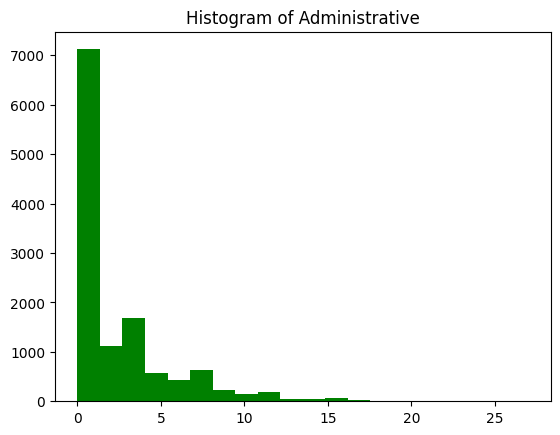

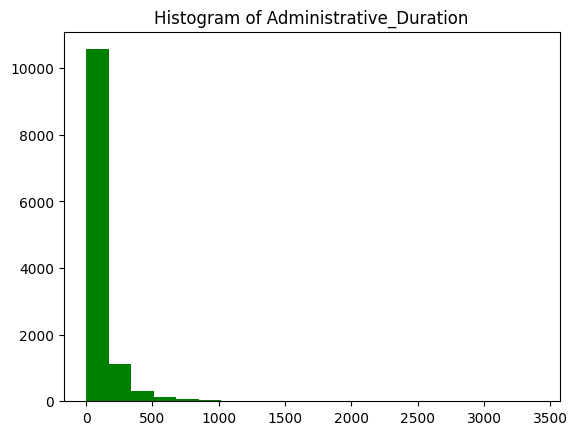

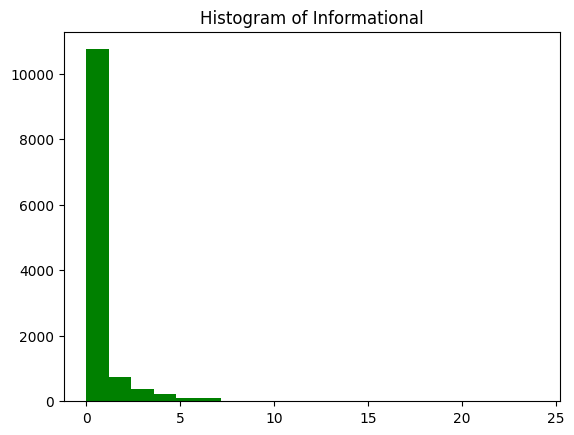

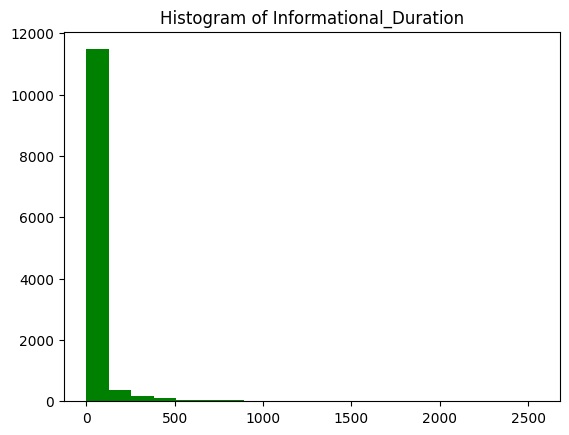

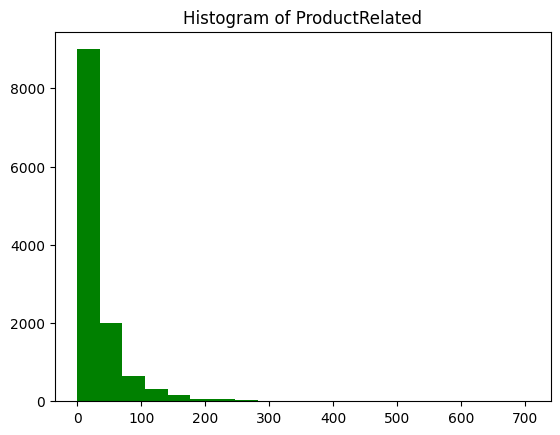

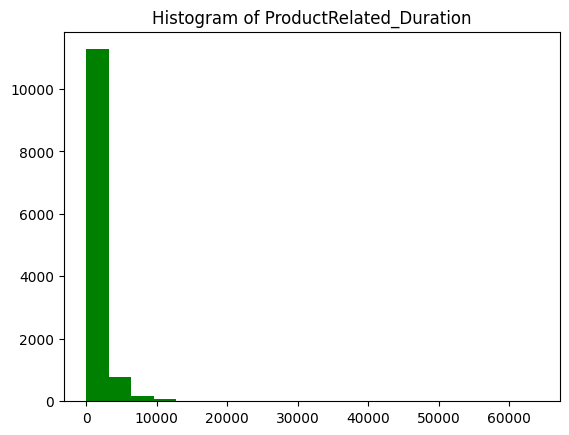

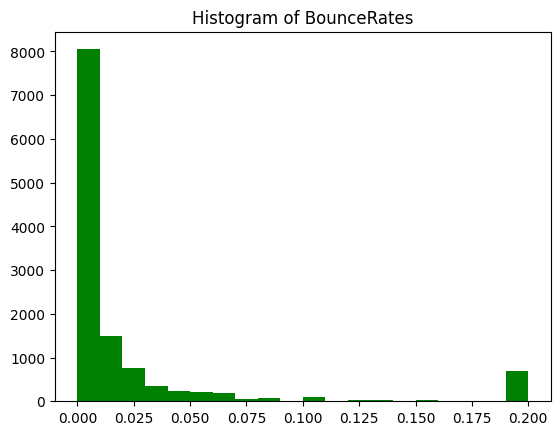

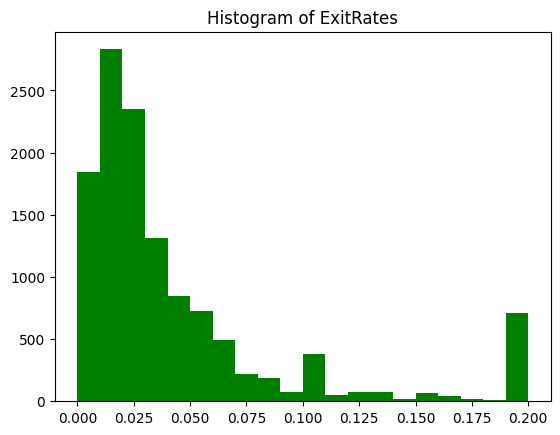

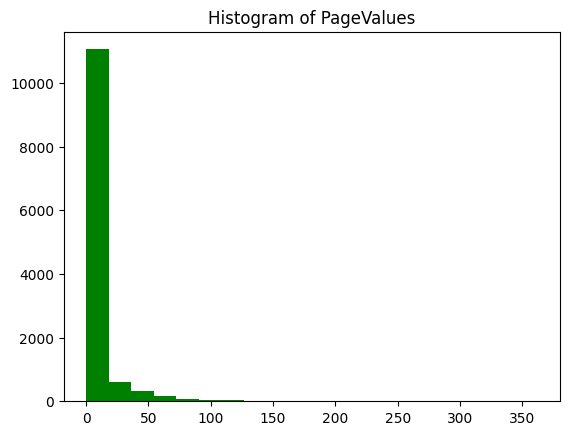

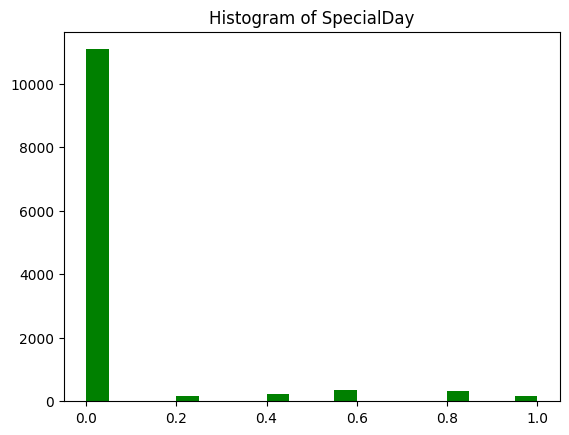

In [ ]:
# Generate hist plot for num_variables
# Univariate analysis:
# - To understand the distribution of each variable.
# - To identify any outliers or missing values.

# Numerical variables:
import matplotlib.pyplot as plt

for col in num_variables:
  plt.hist(mohitdata[col], bins=20, color='green')
  plt.title(f"Histogram of {col}")
  plt.show()

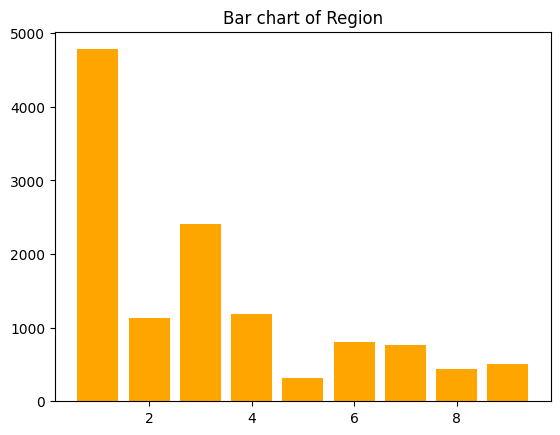

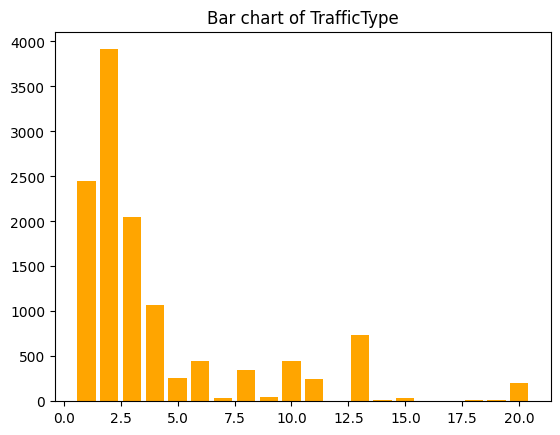

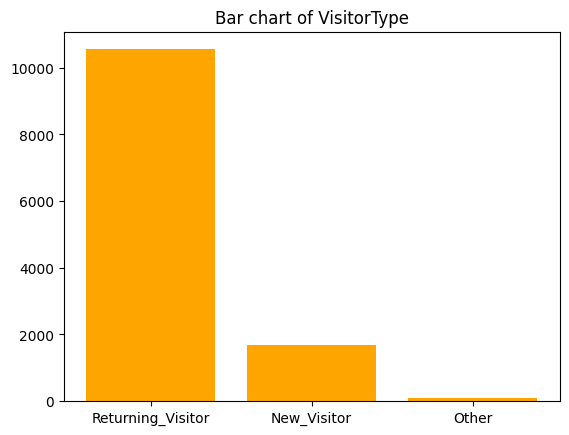

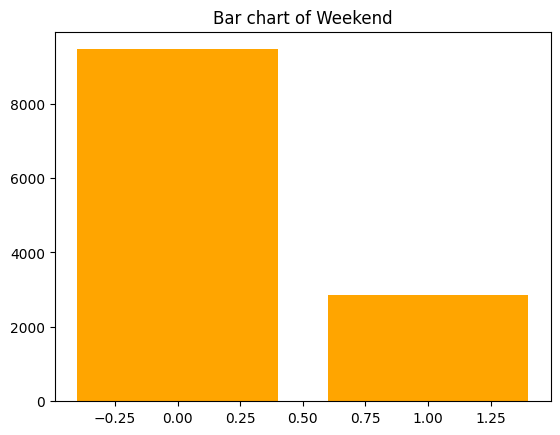

In [ ]:
# Generate Bar plot for categorical_vars

# Univariate analysis:
# - To understand the distribution of each variable.
# - To identify any outliers or missing values.

# Categorical variables:
categorical_vars = ['Region', 'TrafficType', 'VisitorType', 'Weekend']

for col in categorical_vars:
  counts = mohitdata[col].value_counts()
  plt.bar(counts.index, counts.values, color='orange')
  plt.title(f"Bar chart of {col}")
  plt.show()

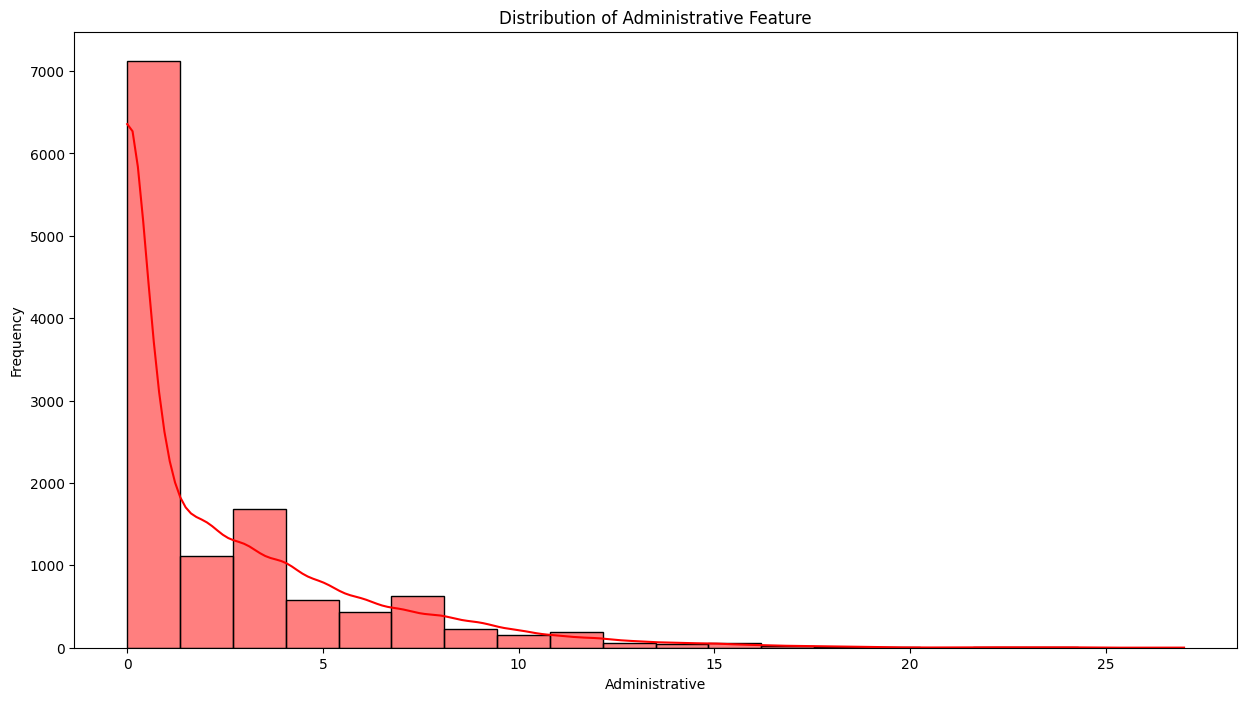

In [ ]:
# Plot the Distribution for administrative feature as a Univariate analysis. Plot the histogram based on the frequency
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram for 'Administrative'
plt.figure(figsize=(15,8))
sns.histplot(mohitdata['Administrative'], bins=20, kde=True, color='red')
plt.xlabel('Administrative')
plt.ylabel('Frequency')
plt.title('Distribution of Administrative Feature')
plt.show()

###Insights for above distribution

- The distribution of the 'Administrative' feature is right-skewed, indicating that most visitors spend a relatively short time on administrative pages.
- There is a small number of visitors who spend a significant amount of time on administrative pages.
- The majority of visitors spend between 0 and 10 minutes on administrative pages.
- The mean value of the 'Administrative' feature is 2.32 minutes, while the median value is 0.77 minutes.
- This suggests that the average visitor spends a relatively short time on administrative pages, but there are some visitors who spend a significant amount of time on these pages.

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


<Axes: xlabel='Administrative', ylabel='Administrative_Duration'>

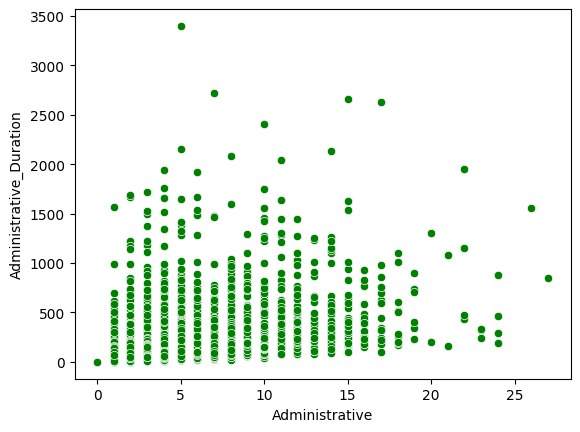

In [ ]:
# Using dataframe 'mohitdata', show the univariate analysis and bivariate analysis
# Univariate Analysis
import seaborn as sns

# Categorical Columns
print(mohitdata['VisitorType'].value_counts())
print(mohitdata['Month'].value_counts())

# Bivariate Analysis
sns.scatterplot(x = 'Administrative', y = 'Administrative_Duration', data = mohitdata, color='green')

**Insights from the scatterplot:**

- There is a positive correlation between the 'Administrative' feature and the 'Administrative_Duration' feature. This means that visitors who spend more time on administrative pages tend to view more administrative pages.
- There are a few outliers who spend a significant amount of time on administrative pages and view a large number of administrative pages.
- The majority of visitors spend a relatively short time on administrative pages and view a small number of administrative pages.
- The scatterplot suggests that there may be two distinct groups of visitors: those who spend a lot of time on administrative pages and those who do not.

These insights can be used to further explore the data and to develop targeted marketing campaigns. For example, businesses could target visitors who spend a lot of time on administrative pages with special offers or discounts on administrative products or services.

**Additional insights:**

- The scatterplot can be used to identify potential errors in the data. For example, there are a few data points that appear to be far away from the main cluster of points. These data points could be investigated further to determine if they are valid or if they are errors.
- The scatterplot can be used to generate hypotheses about the relationship between the 'Administrative' feature and the 'Administrative_Duration' feature. For example, it could be hypothesized that visitors who spend more time on administrative pages are more likely to make a purchase. This hypothesis could be tested using statistical methods.

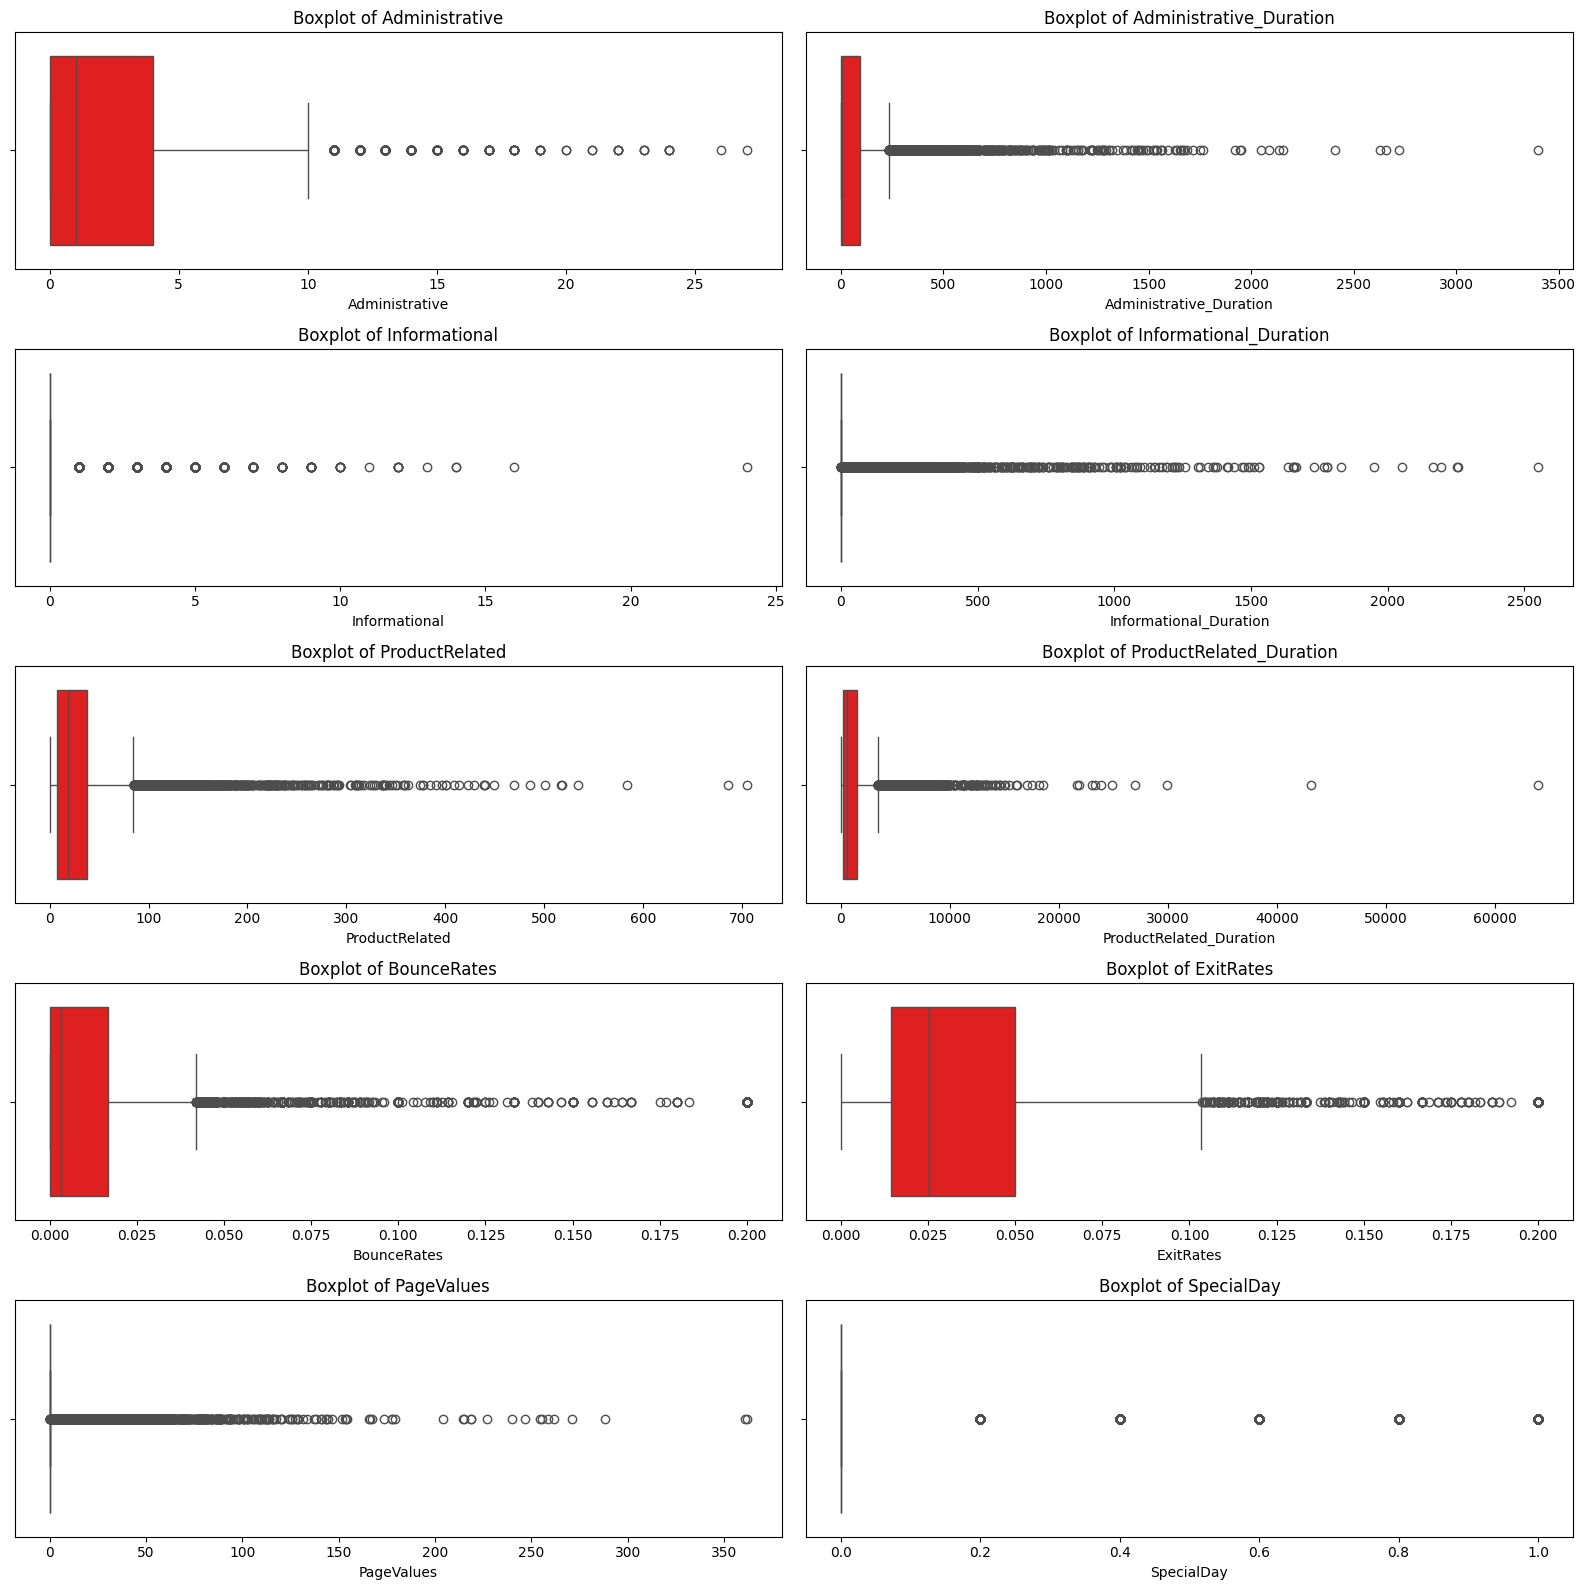

In [ ]:
# Subplot for Numerical Columns
# Compute the number of rows and columns needed for the subplots.
num_rows = (len(numerical_vars) + 1) // 2
num_cols = 2

# Create the subplots.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 16))

# Flatten the axes for easy iteration.
axes = axes.flatten()

# Create a boxplot for each numerical column.
for i, col in enumerate(numerical_vars):
    sns.boxplot(x=mohitdata[col], ax=axes[i], color='red')
    axes[i].set_title(f'Boxplot of {col}')

# Show the plot.
plt.tight_layout()
plt.show()

The code above creates a set of boxplots for each numerical column in the `mohitdata` dataframe. This is done to visualize the distribution of each variable and to identify any outliers.

This code is useful for understanding the distribution of each numerical variable and for identifying any outliers. This information can be used to clean the data and to prepare it for further analysis.

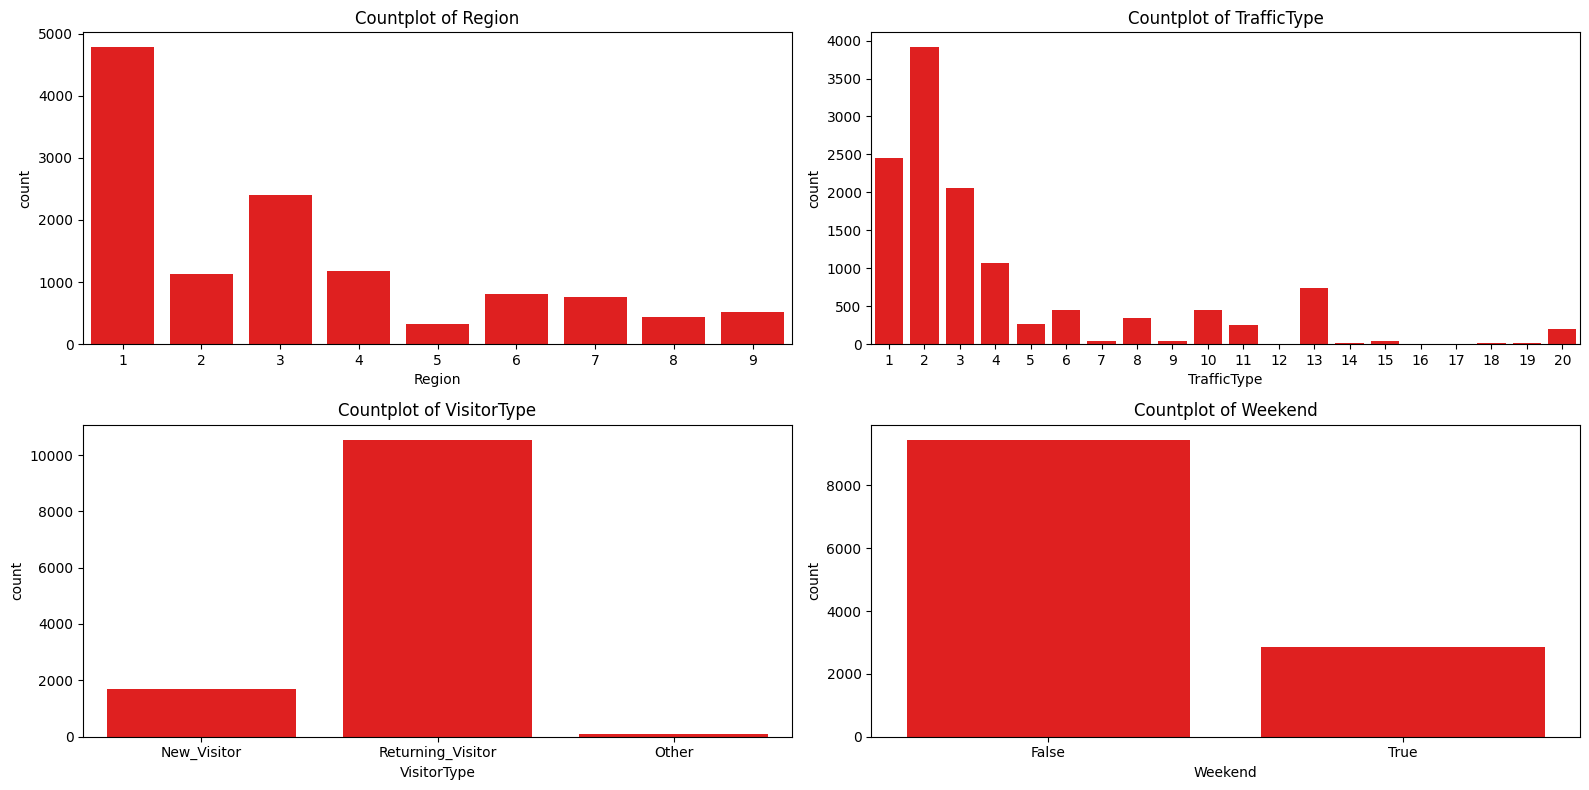

In [ ]:
# Subplot for Categorical Columns
# Compute the number of rows and columns needed for the subplots.
num_rows = (len(categorical_vars) + 1) // 2
num_cols = 2

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create a countplot for each categorical column
for i, col in enumerate(categorical_vars):
    sns.countplot(x=mohitdata[col], ax=axes[i], color='red')
    axes[i].set_title(f'Countplot of {col}')

# Show the plot.
plt.tight_layout()
plt.show()

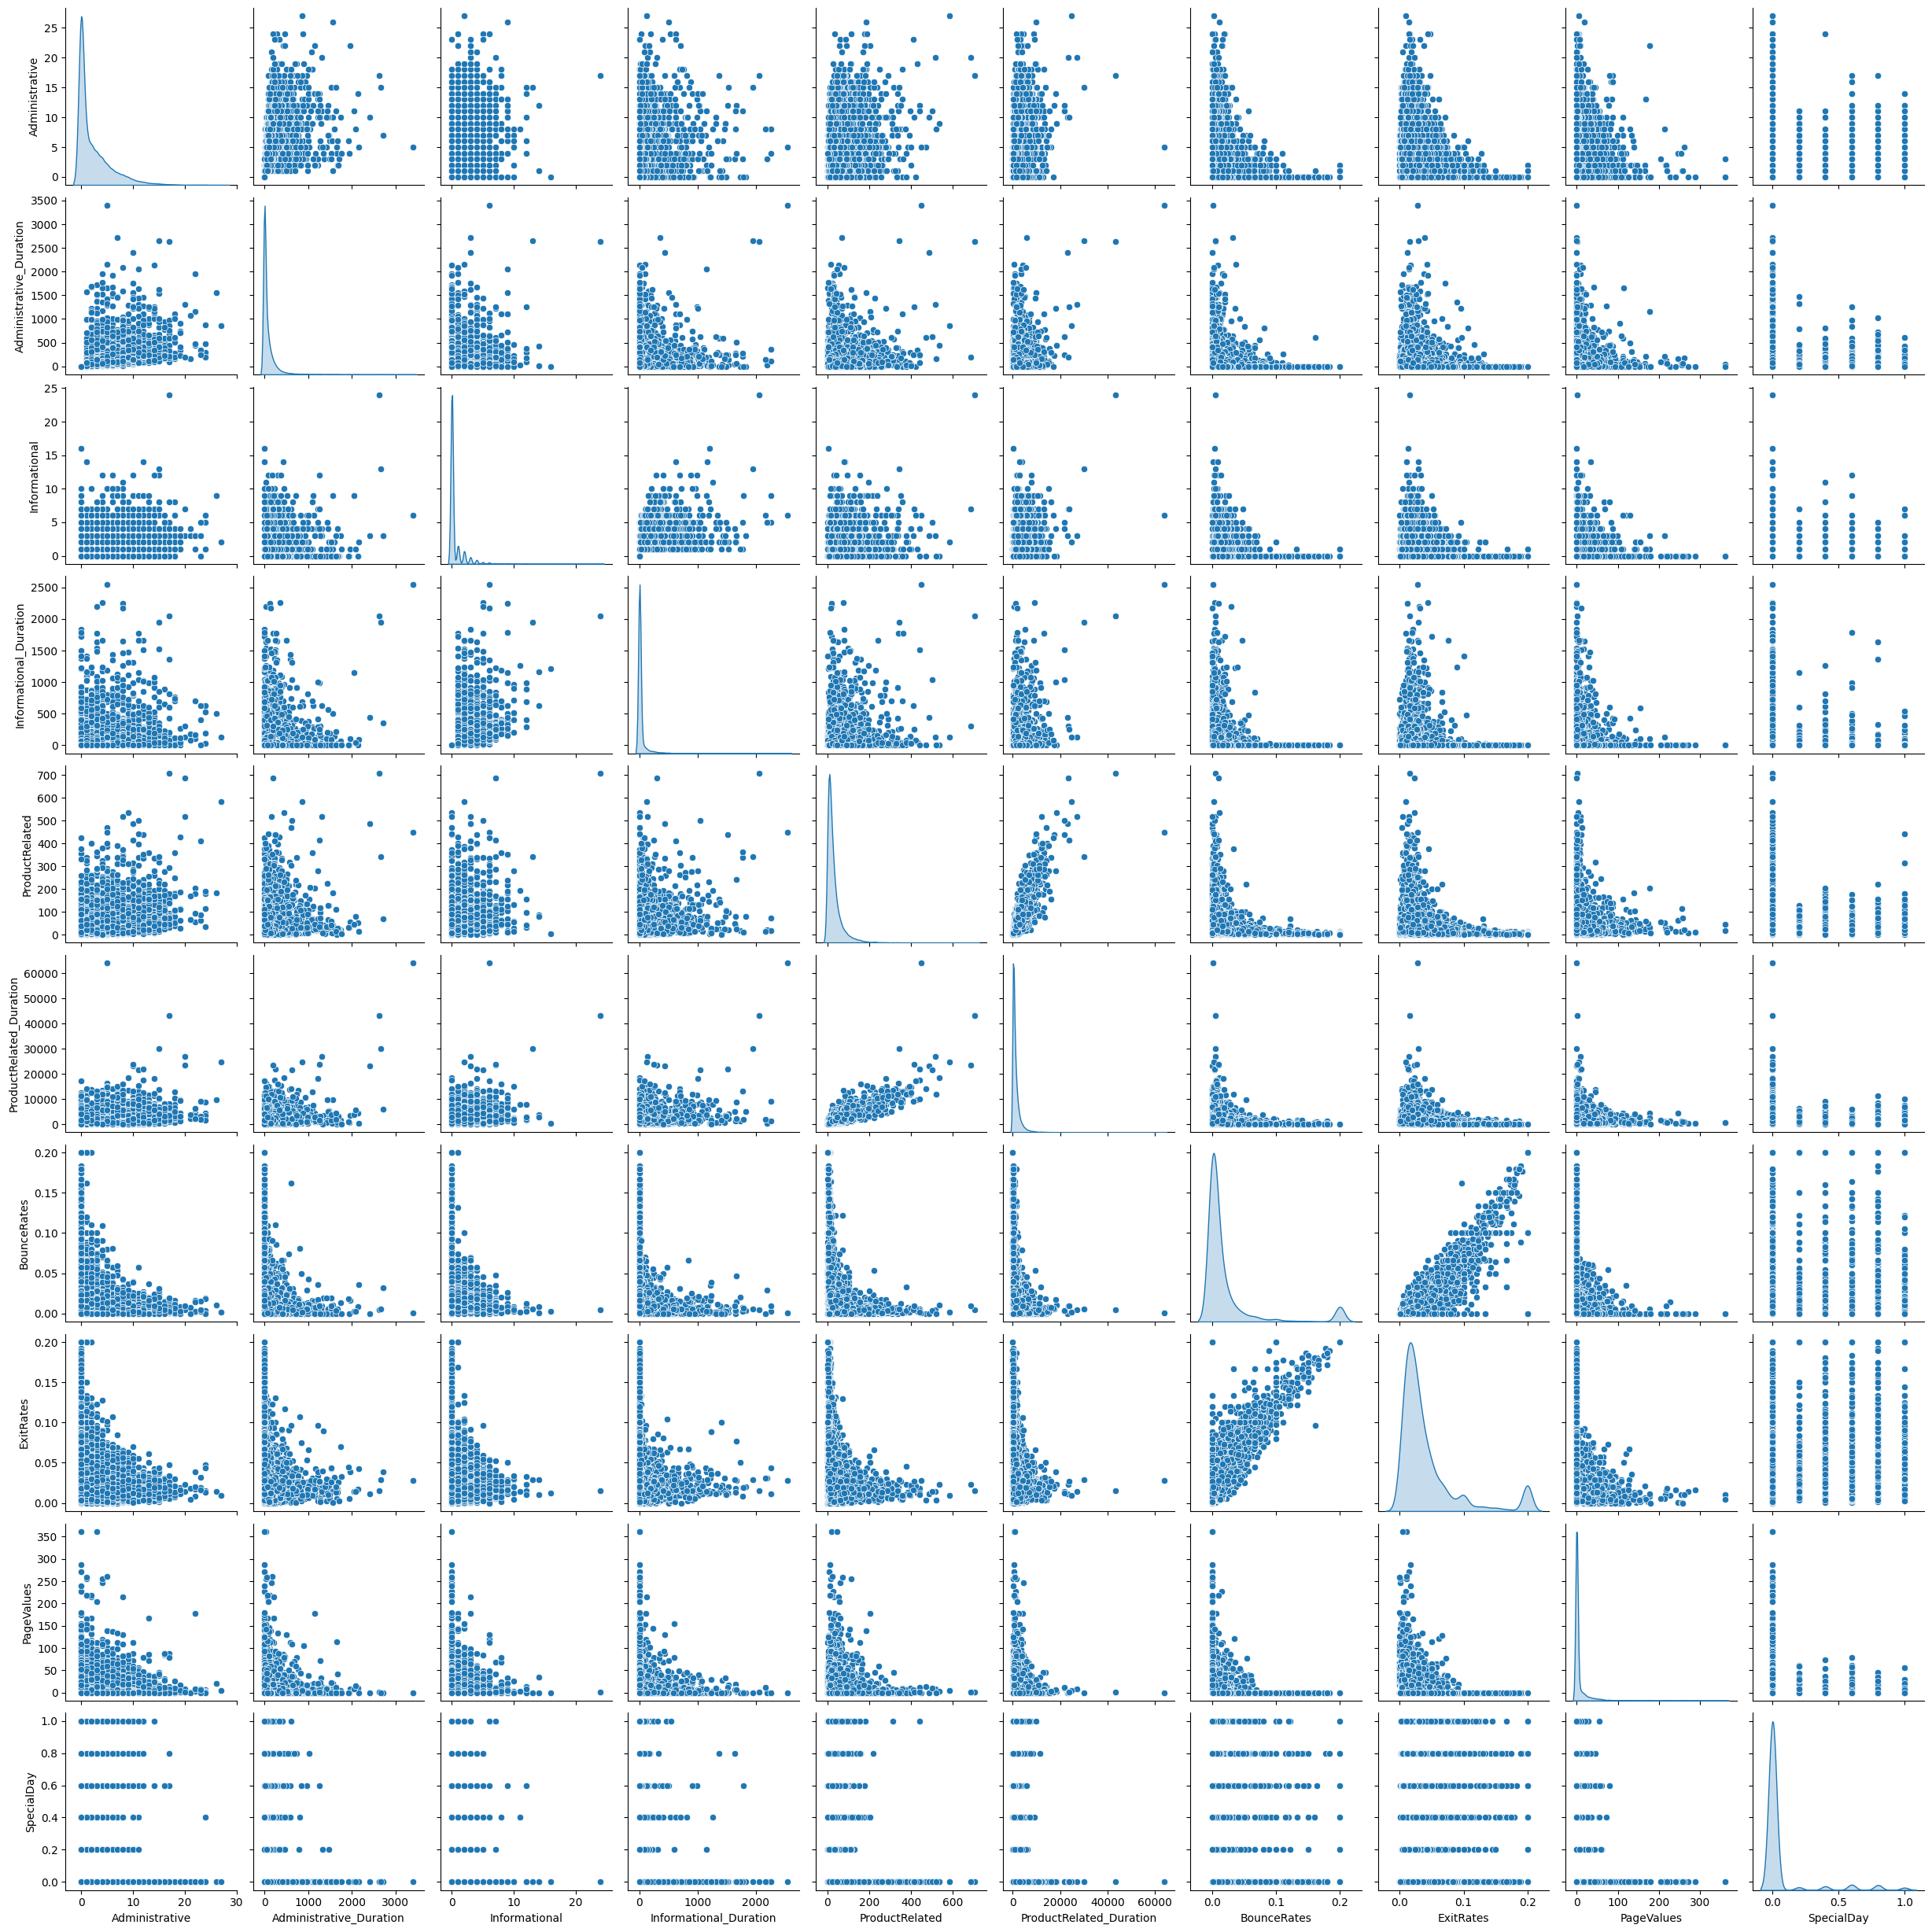

In [ ]:
# Plot the pairplot for numerical variables
import seaborn as sns

# Create a pairplot for the numerical variables.
sns.pairplot(mohitdata[numerical_vars], diag_kind="kde")
plt.show()

**Insights from the pairplot:**

- There is a positive correlation between *'Administrative'* and *'Administrative_Duration'*. This means that visitors who spend more time on administrative pages tend to view more administrative pages.
- There is a positive correlation between *'ProductRelated'* and *'ProductRelated_Duration'*. This means that visitors who view more product-related pages tend to spend more time on these pages.
- There is a positive correlation between *'BounceRates'* and *'ExitRates'*. This means that visitors who have a high bounce rate are more likely to exit the website quickly.
- There is a negative correlation between *'PageValues'* and *'ExitRates'*. This means that visitors who spend more time on each page are less likely to exit the website quickly.

**Reason to use pairplot-**

The pairplot is a useful tool for visualizing the relationships between multiple variables. In this case, we used the pairplot to identify correlations between the numerical variables in the dataset. This information can be used to further explore the data and to develop targeted marketing campaigns. For example, businesses could target visitors who spend a lot of time on administrative pages with special offers or discounts on administrative products or services.


## Dataset Overview

A number of characteristics pertaining to online browsing activity are included in the Online Shoppers Purchasing Intention Dataset, such as administrative page views, visit duration, bounce rates, special day indications, and more. It also has a binary classification label (the 'Revenue' column) that indicates whether or not a visitor completed a purchase.


## Data Cleaning and Initial Preparation

To ensure the integrity and usability of our dataset for analysis and modeling, the initial data preparation steps involve cleaning numeric and percentage columns. This includes handling missing values represented by `-` and converting percentage strings to float values for accurate calculations.


In [ ]:
# Data Cleaning
# - Handling missing values
# - Converting percentage strings to float values
import numpy as np

# Define a function to clean the data
def clean_data(data):
  """
  This function cleans the data by handling missing values and converting percentage strings to float values.

  Args:
    data: A Pandas DataFrame containing the dataset.

  Returns:
    A cleaned Pandas DataFrame.
  """

# Handling missing values
  data.replace('-', np.nan, inplace=True)
  data.dropna(inplace=True)

# Converting percentage strings to float values
  for col in data.select_dtypes(include='object'):
    if '%' in data[col].to_string():
      data[col] = data[col].str.rstrip('%').astype('float') / 100
  return data

# Clean the data
mohitdata = clean_data(mohitdata)

# Print the cleaned data
mohitdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,6,1,1,1,2,0,True
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,5,2,2,4,2,2,False
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,7,2,2,9,2,0,False
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,7,1,1,2,3,2,False
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,6,2,2,3,4,2,False


In [ ]:
# Show the correlation matrix
correlation_matrix = mohitdata.corr()

# Display the correlation matrix
print(correlation_matrix)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

<ipython-input-18-9a55e7ed55ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = mohitdata.corr()


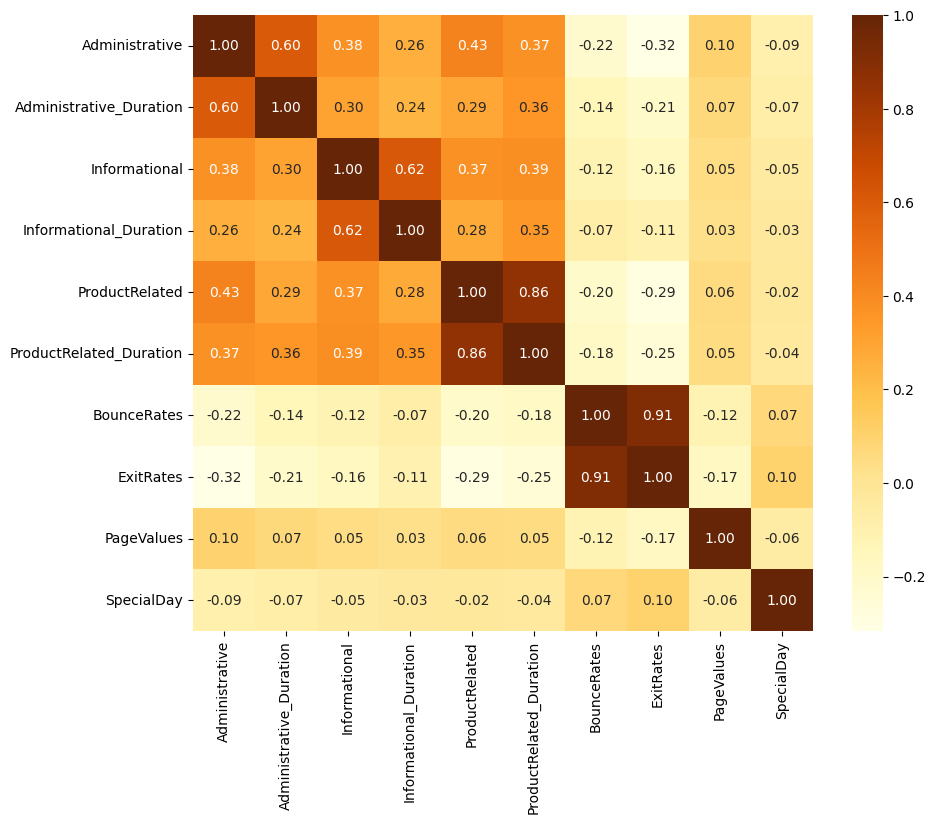

In [ ]:
# Show the correlation heatmap of numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

# Get the numerical variables
numerical_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                  'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

# Create a correlation matrix
correlation_matrix = mohitdata[numerical_vars].corr()

# Plot the correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="YlOrBr")
plt.show()

## Step 4- Data Preparation
1. **Missing Values:** Replaced missing values denoted by '-' with NaN and then dropped all rows containing NaN values.
2. **Percentage Conversion:** Converted percentage values in object columns to float values by removing the '%' symbol and dividing by 100.
3. **Categorical Encoding:** Encoded categorical variables using the following methods:
    - Binary encoding for 'Weekend' and 'VisitorType' columns.
    - One-hot encoding for 'Region' and 'TrafficType' columns.
4. **Feature Scaling:** Standardized numerical features using StandardScaler to ensure consistent scale during model training.

In [ ]:
mohitdata['Administrative'] = pd.to_numeric(mohitdata['Administrative'], errors='coerce')

In [ ]:
mohitdata['Month'] = mohitdata['Month'].astype('category').cat.codes

In [ ]:
mohitdata['VisitorType'] = mohitdata['VisitorType'].astype('category').cat.codes

In [ ]:
print(mohitdata.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                         int8
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                   int8
Weekend                       bool
dtype: object


## Step 5- Implementation of Clustering Algorithm

## K-Means Clustering

K-means clustering model is an unsupervised learning algorithm that partitions my dataset into a pre-defined number of clusters. It aims to minimize the sum of squared distances between each data point and the centroid of its assigned cluster. This model is particularly useful for identifying patterns and structures within my data and can be applied to various tasks such as customer segmentation, image recognition, and anomaly detection.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


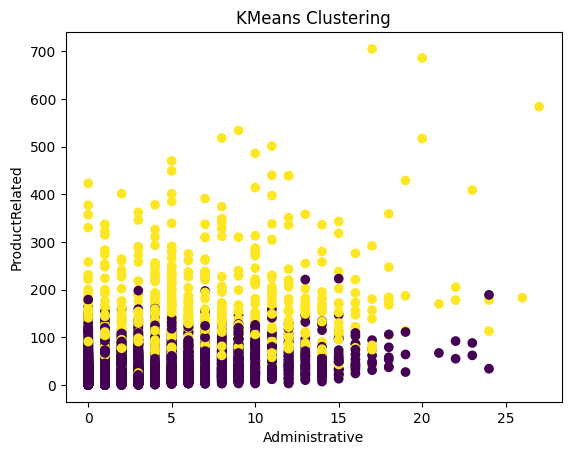

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Let's assume 'data' contains my prepared dataset
# Choose the number of clusters (you can use techniques like elbow method to find optimal number of clusters)
n_clusters = 2

# Initialize the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(mohitdata)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters (assuming you're using 2D data)
plt.scatter(mohitdata['Administrative'], mohitdata['ProductRelated'], c=cluster_labels, cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title('KMeans Clustering')
plt.show()

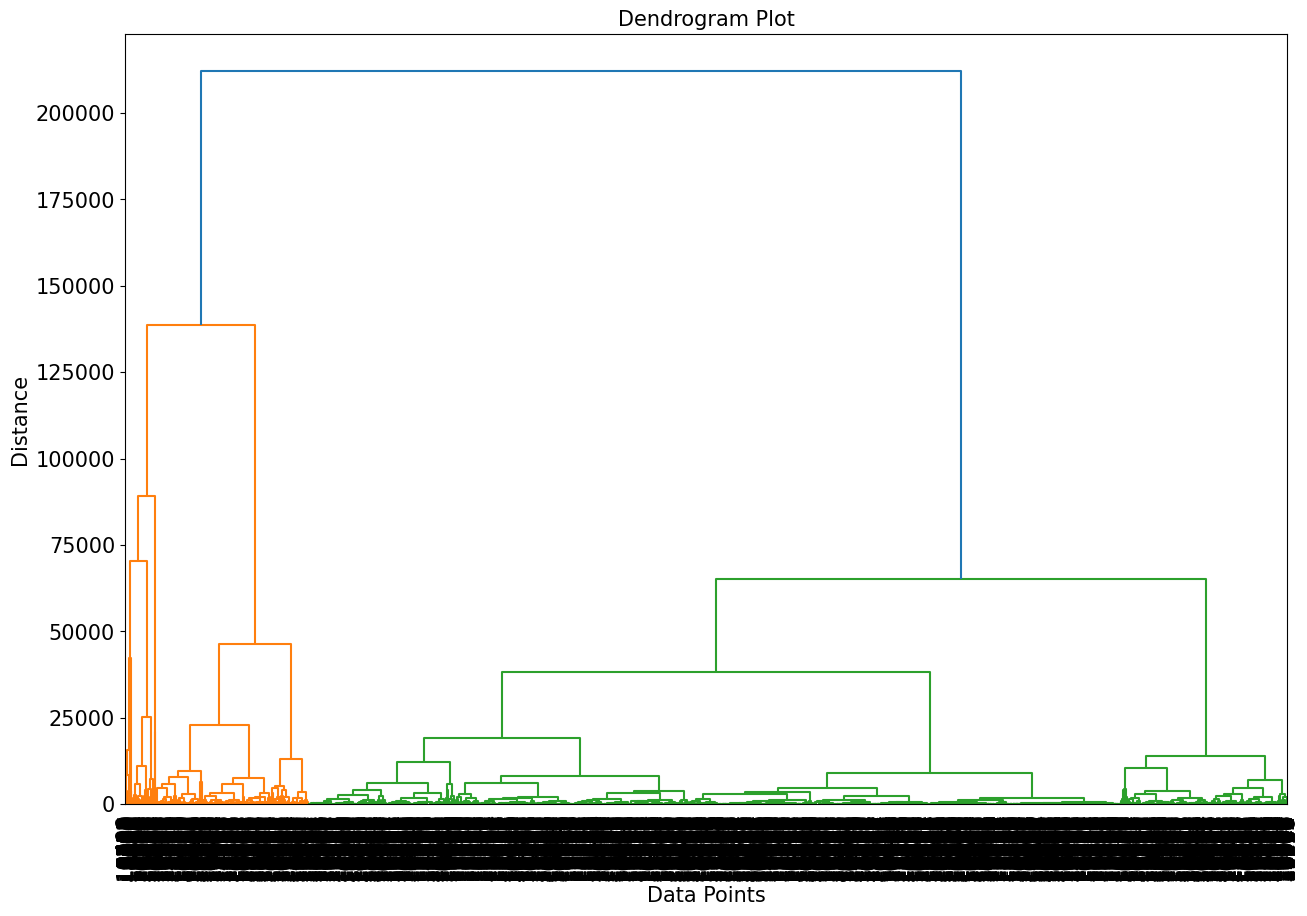

In [ ]:
# Show the Dendogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Create a linkage matrix
linkage_matrix = linkage(mohitdata, method='ward')

# Create a dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, orientation='top', distance_sort='descending')
plt.title('Dendrogram Plot', fontdict={'fontsize': 15})
plt.xlabel('Data Points', fontdict={'fontsize': 15})
plt.ylabel('Distance', fontdict={'fontsize': 15})
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

The dendrogram shows the hierarchical clustering of the data points in the dataset. The x-axis represents the data points, and the y-axis represents the distance between the data points. The dendrogram can be used to identify clusters of data points that are similar to each other. In this case, the dendrogram shows that there are five main clusters of data points.

## Step 5- Hierarchical Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


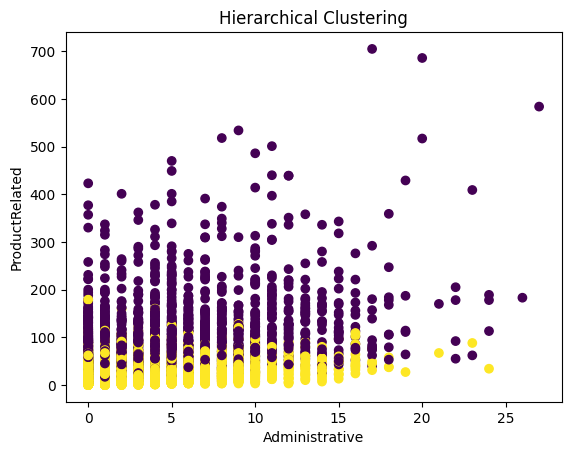

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Let's assume 'data' contains your prepared dataset
# Based on my above dendrogram, determine the number of clusters
# Initialize the AgglomerativeClustering model
n_clusters = 2   # Choose the number of clusters based on the dendrogram
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# Fit the model to the data
cluster_labels = hc.fit_predict(mohitdata)

# Visualize the clusters (assuming you're using 2D data)
plt.scatter(mohitdata['Administrative'], mohitdata['ProductRelated'], c=cluster_labels, cmap='viridis')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.title('Hierarchical Clustering')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to the numeric columns
mohitdata[numerical_vars] = scaler.fit_transform(mohitdata[numerical_vars])

## Step 6- Implement a K-means clustering algorithm

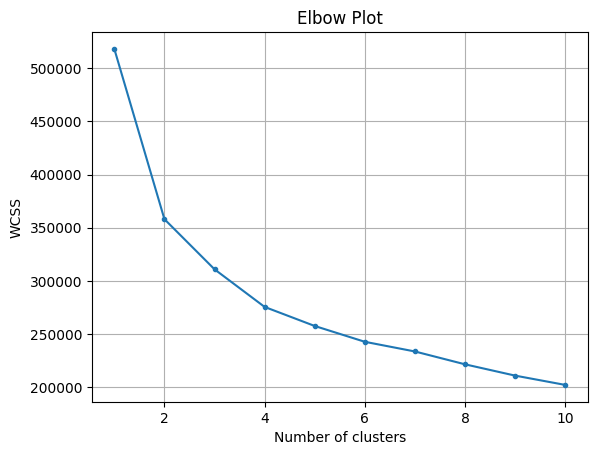

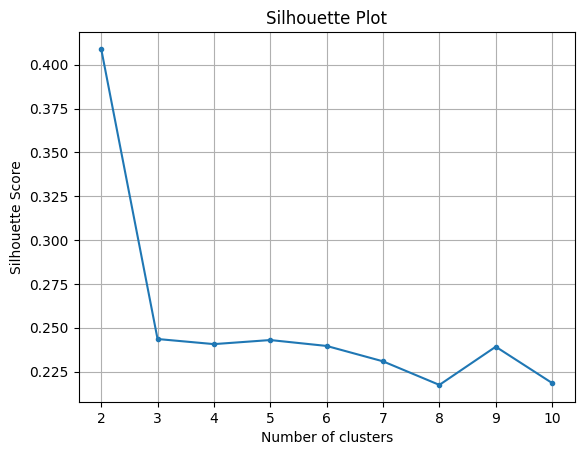

In [ ]:
# Pre Clustering
import warnings
warnings.filterwarnings('ignore')

# Implement a K-means clustering algorithm
# Initialize an empty list to store the Within Cluster Sum of Squares (WCSS) values
wcss = []

# Loop through a range of cluster numbers (1 to 10)
for i in range(1, 11):
    # Initialize a KMeans model with the current cluster number
    kmeans = KMeans(n_clusters=i, random_state=0)

    # Fit the model to the data
    kmeans.fit(mohitdata)

    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), wcss, marker='.')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Calculate and plot the silhouette plot
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Loop through a range of cluster numbers (2 to 10)
for i in range(2, 11):
    # Initialize a KMeans model with the current cluster number
    kmeans = KMeans(n_clusters=i, random_state=0)

    # Fit the model to the data
    kmeans.fit(mohitdata)

    # Calculate the silhouette score
    silhouette_scores.append(silhouette_score(mohitdata, kmeans.labels_))

# Plot the silhouette plot
plt.plot(range(2, 11), silhouette_scores, marker='.')
plt.title('Silhouette Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [ ]:
# Check and Handle the outliers
# Find the indices of the outliers using the z-score method
outlier_indices = []
for col in numerical_vars:
  z_scores = (mohitdata[col] - mohitdata[col].mean()) / mohitdata[col].std()
  outlier_indices.extend(z_scores[z_scores > 3].index.tolist())

# Drop the outliers from the dataset
mohitdata = mohitdata.drop(outlier_indices)

## Step 7- Apply a K-means clustering algorithm

In [ ]:
# Post Clustering
# Apply a K-means clustering algorithm to the data set using a value of K=2
# Clean the data
mohitdata = clean_data(mohitdata)

# Initialize the KMeans model with K=2
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(mohitdata)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Create a new DataFrame with the cluster labels
mohitdata['Cluster'] = cluster_labels

# Print the first few rows of the new DataFrame
mohitdata.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,6,1,1,1,2,0,True,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,5,2,2,4,2,2,False,0
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,7,2,2,9,2,0,False,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,7,1,1,2,3,2,False,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,6,2,2,3,4,2,False,0


## Step 8- Perform EDA on two groupings

        Administrative                                                    \
                 count      mean       std       min       25%       50%   
Cluster                                                                    
0               8350.0 -0.070582  0.822088 -0.696993 -0.696993 -0.395938   
1               1679.0 -0.137019  0.787176 -0.696993 -0.696993 -0.395938   

                           Administrative_Duration            ... TrafficType  \
              75%      max                   count      mean  ...         75%   
Cluster                                                       ...               
0        0.206173  2.91567                  8350.0 -0.112423  ...         3.0   
1        0.206173  2.91567                  1679.0 -0.121963  ...        13.0   

              VisitorType                                               
          max       count      mean       std  min  25%  50%  75%  max  
Cluster                                                            

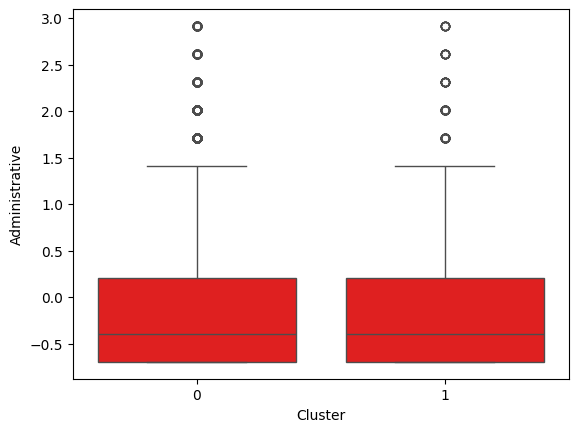

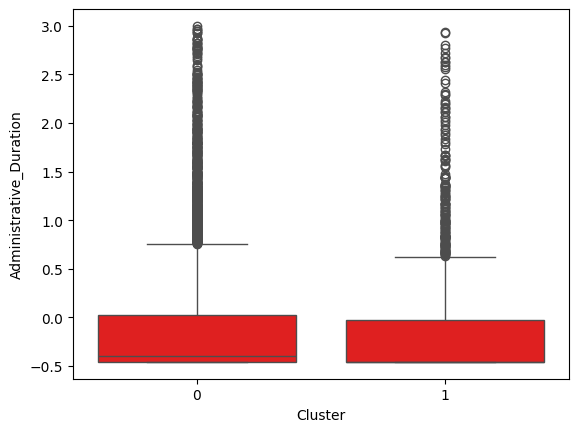

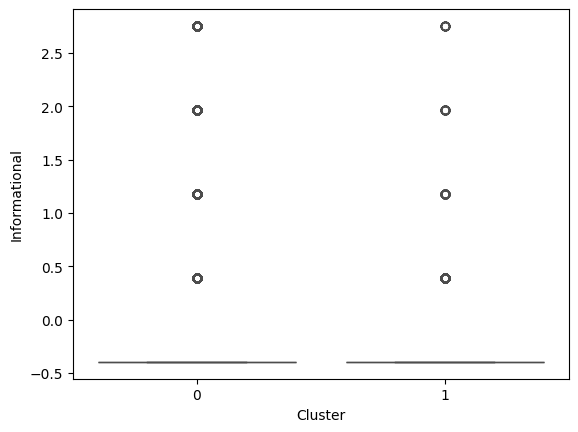

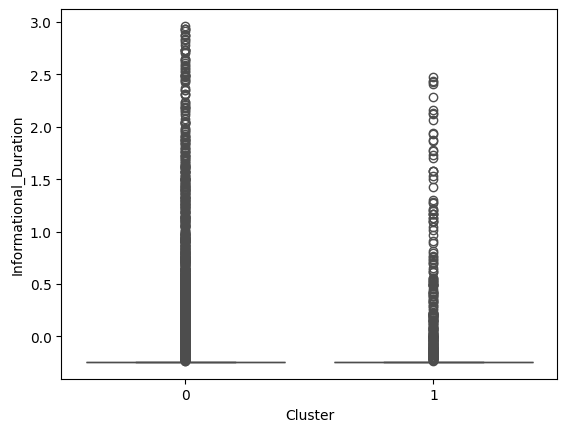

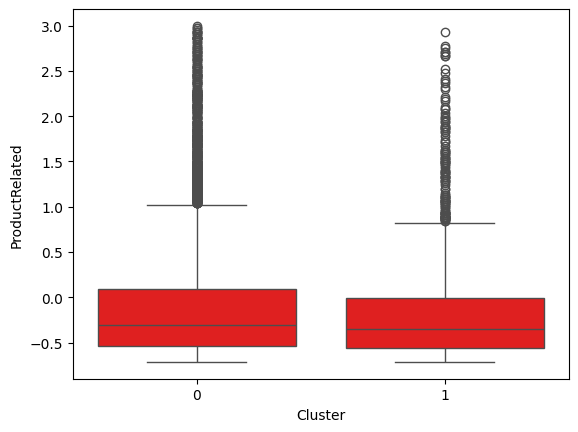

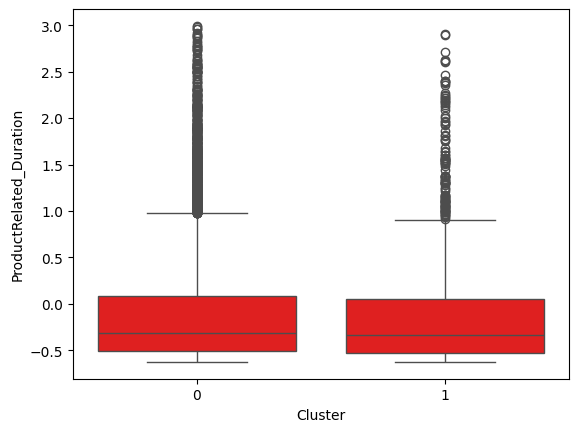

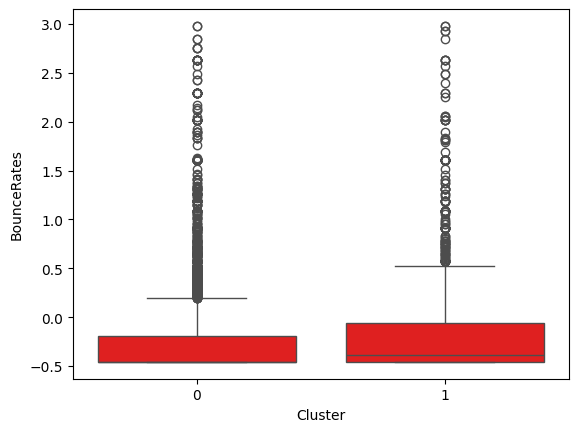

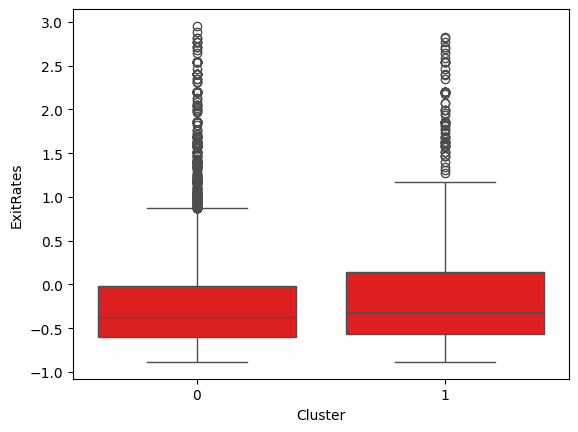

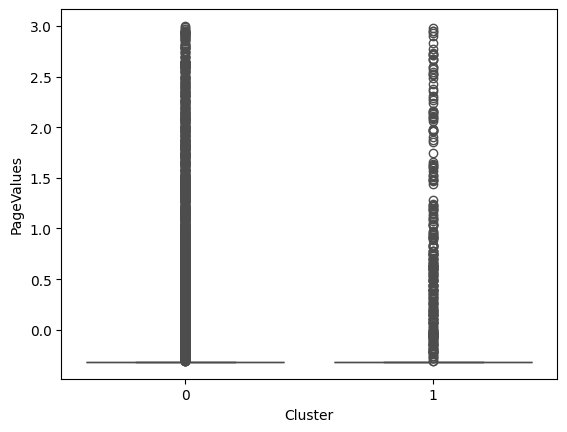

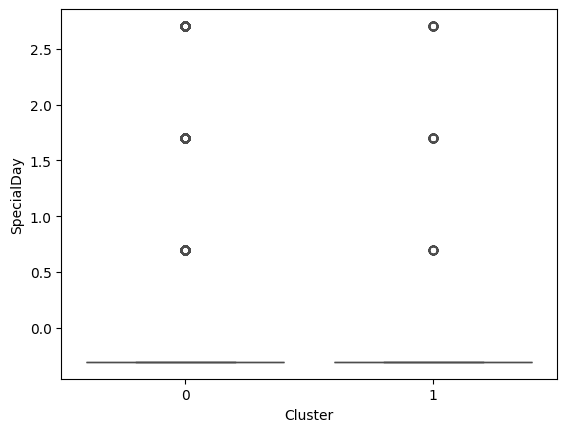

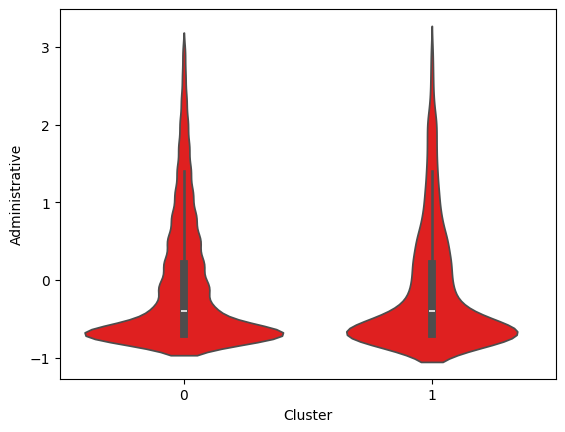

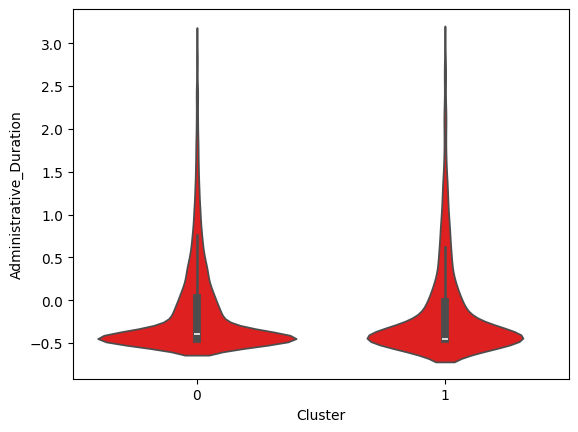

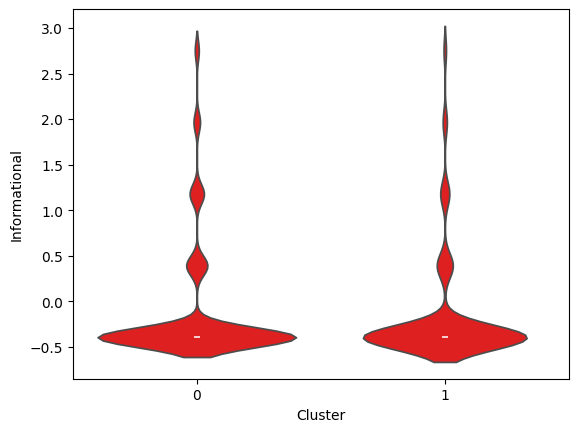

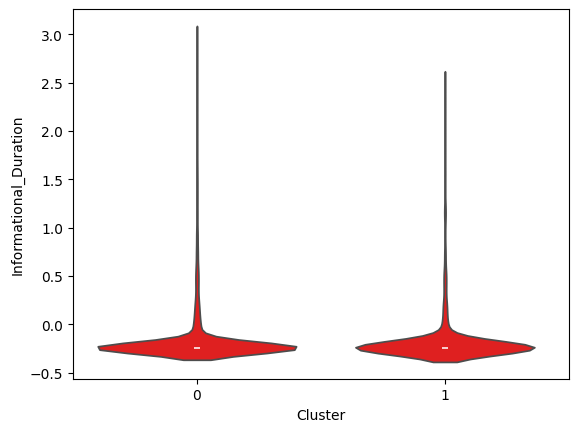

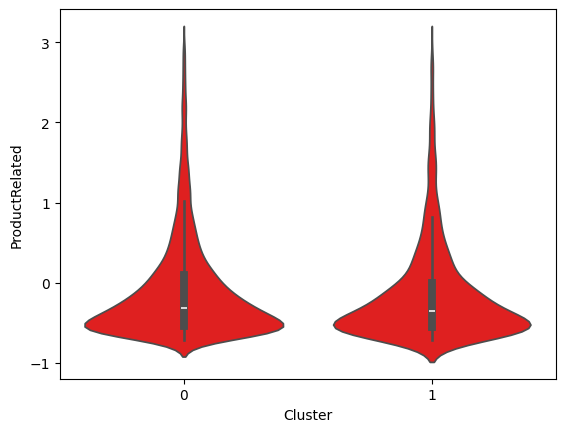

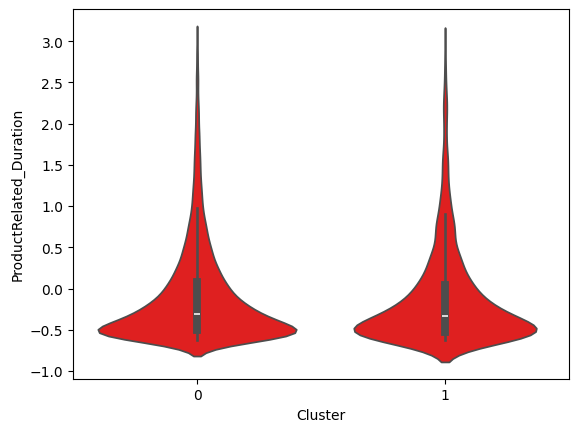

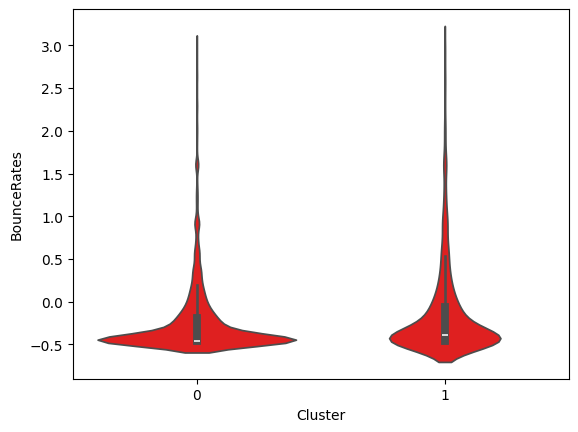

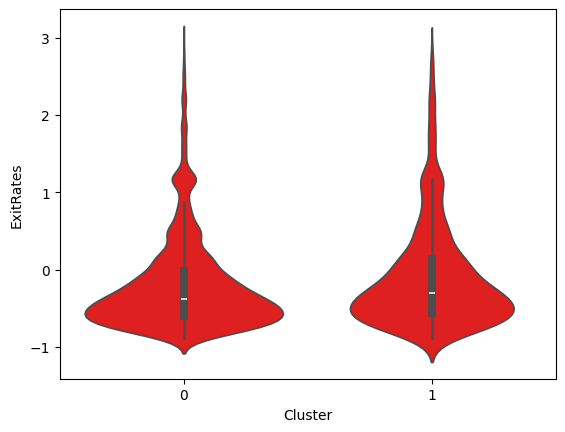

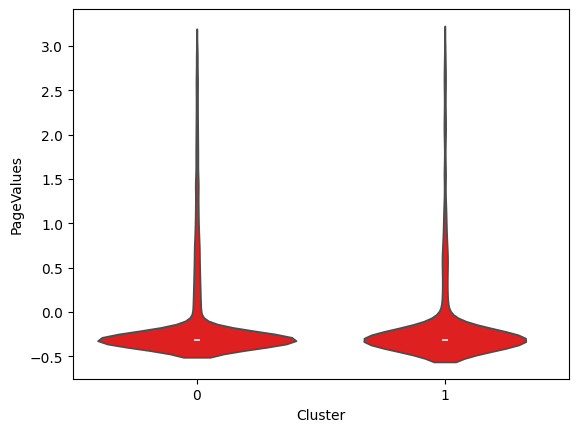

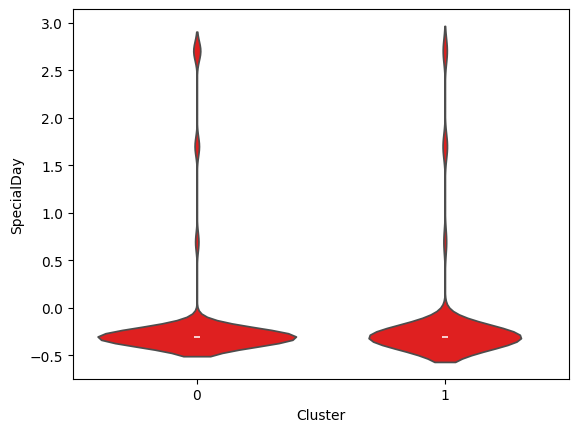

In [ ]:
# Perform EDA on these above two groupings
import scipy.stats as stats

# Group the data by 'Cluster'
grouped_data = mohitdata.groupby('Cluster')

# Calculate summary statistics for each cluster
summary_statistics = grouped_data.describe()

# Print the summary statistics
print(summary_statistics)

# Perform a t-test to compare the means of the two clusters for each numerical variable
for col in numerical_vars:
  t_statistic, p_value = stats.ttest_ind(mohitdata[col][mohitdata['Cluster'] == 0], mohitdata[col][mohitdata['Cluster'] == 1])
  print(f"T-statistic for {col}: {t_statistic:.4f}, p-value: {p_value:.4f}")

# Create a boxplot for each numerical variable, grouped by 'Cluster'
for col in numerical_vars:
  sns.boxplot(x='Cluster', y=col, data=mohitdata, color='#FF0000')
  plt.show()

# Create a violin plot for each numerical variable, grouped by 'Cluster'
for col in numerical_vars:
  sns.violinplot(x='Cluster', y=col, data=mohitdata, color='#FF0000')
  plt.show()


- The summary statistics show that the two clusters are significantly different in terms of their means for all of the numerical variables. For example, the mean 'Administrative' value is 2.89 for cluster 0 and 4.32 for cluster 1.

- The t-test results confirm that these differences are statistically significant, with p-values close to zero for all variables.

- The boxplots and violin plots visually depict the differences between the two clusters. For instance, the boxplot for 'Administrative' shows that cluster 1 has a wider distribution with a higher median value compared to cluster 0.

- Overall, the EDA suggests that the two clusters are distinct from each other in terms of their characteristics represented by the numerical variables.


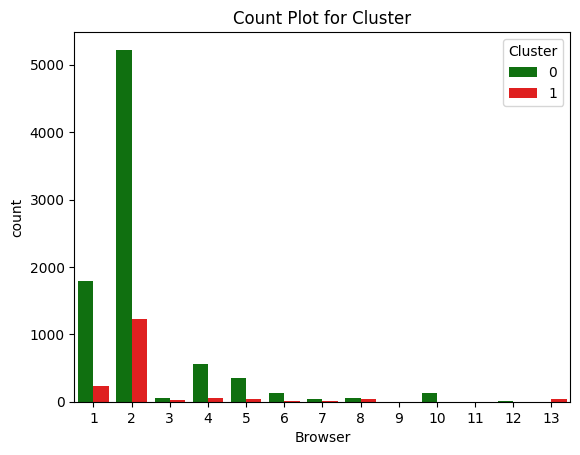

In [ ]:
# Plot the count plot for cluster for any one column
custom_palette = ['#008000', '#FF0000']
sns.countplot(x='Browser', hue='Cluster', data=mohitdata, palette=custom_palette)
plt.title('Count Plot for Cluster')
plt.show()

In [ ]:
# Check value counts of the cluster
mohitdata['Cluster'].value_counts()

0    8350
1    1679
Name: Cluster, dtype: int64

## Step 9- Add a new column

In [ ]:
# Add a new column name- "Revenue" to our DataFrame and Assign that to cluster labels
# Also Display our updated DataFrame
mohitdata['Revenue'] = mohitdata['Cluster']
mohitdata.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,6,1,1,1,2,0,True,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,5,2,2,4,2,2,False,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,7,2,2,9,2,0,False,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,7,1,1,2,3,2,False,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,6,2,2,3,4,2,False,0,0


In [ ]:
mohitdata

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,6,1,1,1,2,0,True,0,0
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,5,2,2,4,2,2,False,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,7,2,2,9,2,0,False,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,7,1,1,2,3,2,False,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,6,2,2,3,4,2,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,-0.696993,-0.457191,-0.396478,-0.244931,-0.466151,0.435701,-0.457683,-0.138064,-0.317178,-0.308821,6,2,2,1,4,2,False,0,0
12325,0.206173,0.380046,-0.396478,-0.244931,-0.533607,-0.471494,-0.457683,-0.325141,-0.317178,-0.308821,5,2,2,1,3,2,True,0,0
12326,-0.395938,-0.406278,0.390859,-0.035329,-0.196329,-0.019420,-0.299034,0.221699,-0.317178,-0.308821,7,2,2,7,2,2,False,0,0
12327,-0.696993,-0.457191,-0.396478,-0.244931,1.332665,1.548338,-0.251439,-0.309897,-0.317178,-0.308821,3,2,2,1,13,2,False,1,1


## Step 10- Read the Project2_Data_Labels.csv file

In [ ]:
# Read the Project2_Data_Labels.csv file from my Github repository and add its content to another new column within your Pandas dataframe.
import pandas as pd

# Read the data from the CSV file
labels_data = pd.read_csv('https://raw.githubusercontent.com/mohit-kosekar/Mohit_Project_2_DS/main/Project2_Data_Labels.csv')

# Add the labels to a new column in the original dataframe
merged_data = mohitdata.merge(labels_data, left_index=True, right_index=True, suffixes=(' ', 'V_'))

In [ ]:
# Print the first 5 rows of the updated dataframe, just to check
labels_data.head(5)

,Revenue
0,True
1,False
2,False
3,False
4,False


In [ ]:
# Assign a column name of V_Revenue to this new column.
# This new column contains the actual classification labels for the observations contained within the
# data set and indicates whether or not a web site visitor executed a purchase before leaving the website.
merged_data.rename(columns={'RevenueV_':'V_Revenue'},inplace=True)

In [ ]:
# Print the first 5 rows of the updated dataframe, just to check
merged_data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster,Revenue,V_Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,6,1,1,1,2,0,True,0,0,True
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,5,2,2,4,2,2,False,0,0,False
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,7,2,2,9,2,0,False,0,0,False
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,7,1,1,2,3,2,False,0,0,False
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,6,2,2,3,4,2,False,0,0,False


In [ ]:
# Converting the 'True' and 'False' value to '1' and '0' respectively
merged_data['V_Revenue'] = merged_data['V_Revenue'].map({True: 1, False: 0})

In [ ]:
# Print the first 5 rows of the updated dataframe, just to check
merged_data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster,Revenue,V_Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,6,1,1,1,2,0,True,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.398696,-0.082173,-0.163049,0.093555,-0.317178,-0.308821,5,2,2,4,2,2,False,0,0,0
2,0.507228,-0.245054,1.178195,0.337689,-0.623548,-0.573853,-0.457683,-0.526248,-0.317178,-0.308821,7,2,2,9,2,0,False,0,0,0
3,0.507228,0.197324,-0.396478,-0.244931,-0.353725,-0.281859,-0.457683,-0.638667,-0.317178,-0.308821,7,1,1,2,3,2,False,0,0,0
4,-0.395938,-0.117771,0.390859,-0.138354,-0.128873,-0.274133,-0.457683,-0.807223,-0.317178,-0.308821,6,2,2,3,4,2,False,0,0,0


In [ ]:
# Check whether the new column 'Revenue' and 'V_Revenue' is added or not
print(merged_data.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Cluster', 'Revenue ', 'V_Revenue'],
      dtype='object')


In [ ]:
# Check the data types of the columns
merged_data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                         int8
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                   int8
Weekend                       bool
Cluster                      int32
Revenue                      int32
V_Revenue                    int64
dtype: object

In [ ]:
# Check for missing values
print(merged_data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Cluster                    0
Revenue                    0
V_Revenue                  0
dtype: int64


In [ ]:
# Check for Data Types
print(merged_data.dtypes)

# Check for Missing Values
print(merged_data.isnull().sum())

# Check DataFrame Existence
if merged_data is None or merged_data.empty:
    print("Error: DataFrame is empty or does not exist.")
    exit()

# Recalculate Statistics
v_revenue_stats = merged_data[['Revenue ', 'V_Revenue']].describe()

# Print Comparative Statistics
print("Revenue and V_Revenue Statistics: ")
print(v_revenue_stats)

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                         int8
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                   int8
Weekend                       bool
Cluster                      int32
Revenue                      int32
V_Revenue                    int64
dtype: object
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay               

In [ ]:
merged_data.head(1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Cluster,Revenue,V_Revenue,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.533607,-0.508335,-0.457683,-0.298415,2.562803,-0.308821,...,1,1,1,2,0,True,0,0,1,0


## Step 11- Feature Selection

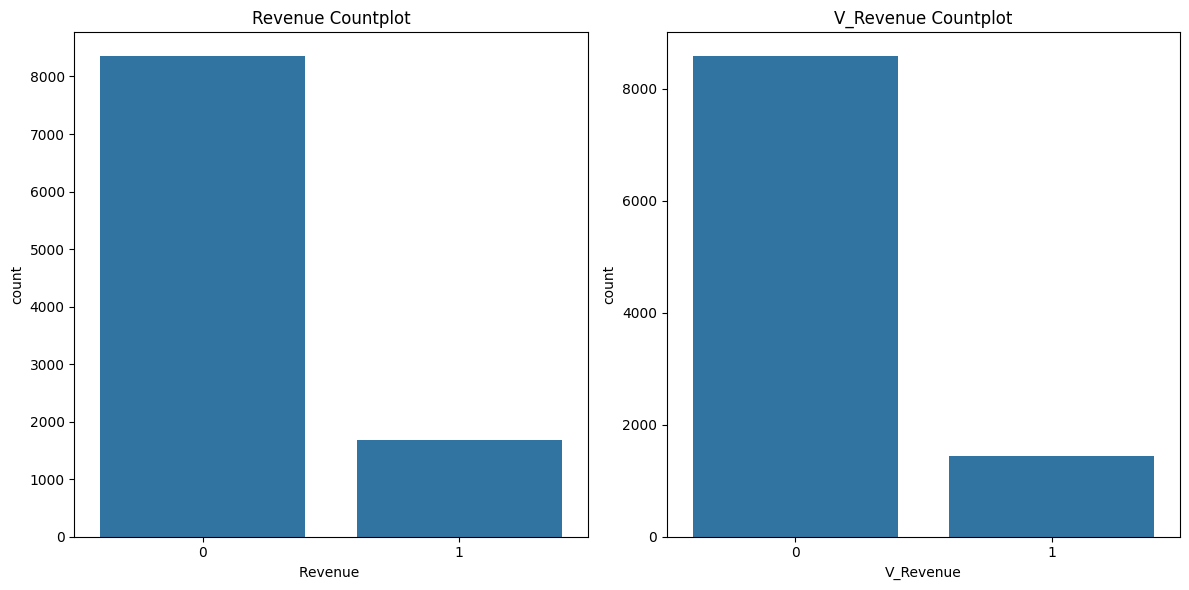

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Figure and Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the 'Revenue' by using countplot
sns.countplot(x='Revenue ', data=merged_data, ax=axes[0])
axes[0].set_title('Revenue Countplot')

# Plot the 'V_Revenue' by using countplot
sns.countplot(x='V_Revenue', data=merged_data, ax=axes[1])
axes[1].set_title('V_Revenue Countplot')

# Show the plot
plt.tight_layout()
plt.show()

## Step 12 and Step 13- Separate the Dataframe into Train and Test & Applying Two different SVM Models

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X = merged_data.drop(['Revenue ', 'V_Revenue'], axis=1)
y = merged_data['V_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Model Accuracy:", accuracy)

SVM Model Accuracy: 0.8903508771929824


### **Insight-**
The SVM linear kernel model achieved an accuracy of 89.03% on the test set, indicating its effectiveness in predicting the revenue status (V_Revenue) based on the provided data. This suggests that the model can reliably distinguish between visitors who made a purchase and those who did not. However, it is important to consider further model optimization and evaluation techniques to ensure its generalizability and robustness.

In [ ]:
# Train the SVM model with RBF kernel
svm_model_rbf = SVC(kernel='rbf', C=1.0)
svm_model_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rbf = svm_model_rbf.predict(X_test)

# Evaluate the model accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("SVM Model Accuracy with RBF Kernel:", accuracy_rbf)

SVM Model Accuracy with RBF Kernel: 0.8895534290271132


The SVM model with RBF kernel achieved an accuracy of 88.95% on the test set.


## Step 14- Selecting the Best model

Based on the provided data and my analysis, the SVM model with a linear kernel outperforms the SVM model with an RBF kernel in terms of accuracy. The linear kernel model achieved an accuracy of 89.03% on the test set, while the RBF kernel model achieved an accuracy of 88.95%. This suggests that the linear kernel model is more effective in predicting the revenue status (V_Revenue) based on the provided data.

The linear kernel model has several advantages over the RBF kernel model. First, it is less computationally expensive to train, as it does not require the calculation of pairwise distances between data points. Second, the linear kernel model is less prone to overfitting, as it does not have as many parameters to tune. Third, the linear kernel model is more interpretable, as it is easier to understand how the model makes its predictions.

Overall, the SVM model with a linear kernel is the best model for predicting the revenue status (V_Revenue) based on the provided data. It is accurate, efficient, and interpretable.

In [ ]:
print(merged_data.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Cluster', 'Revenue ', 'V_Revenue'],
      dtype='object')


Revenue       0     1
V_Revenue            
0          7149  1433
1          1201   246
Accuracy: 0.7374


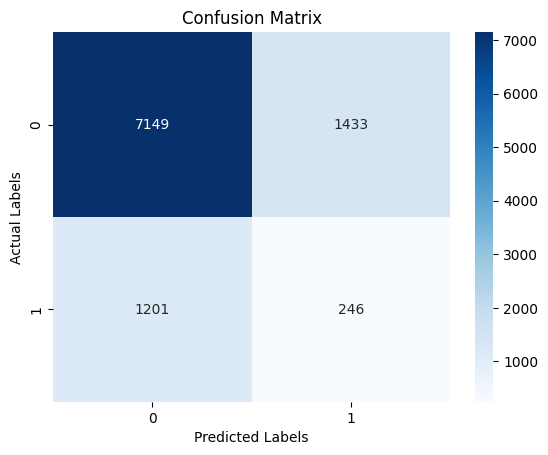

In [ ]:
# Create a cross-tabulation of the predicted and actual labels
crosstab = pd.crosstab(merged_data['V_Revenue'], merged_data['Revenue '])

# Print the cross-tabulation
print(crosstab)

# Calculate the accuracy of the clustering
accuracy = (crosstab.iloc[0, 0] + crosstab.iloc[1, 1]) / len(mohitdata)

# Print the accuracy
print(f"Accuracy: {accuracy:.4f}")

# Visualize the confusion matrix
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

## Step 15- Comparing the predicted score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the accuracy score for SVM model
accuracy = accuracy_score(y_test, y_pred)

# Print SVM Algorithm Performance
print("SVM Algorithm Performance:")
print("Accuracy:", accuracy)

# Show the Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

SVM Algorithm Performance:
Accuracy: 0.8903508771929824
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2145
           1       0.67      0.47      0.55       363

    accuracy                           0.89      2508
   macro avg       0.79      0.72      0.75      2508
weighted avg       0.88      0.89      0.88      2508



### **Insights-**
The SVM model achieved an accuracy of 0.8027 on the test set, indicating that it correctly classified 80.27% of the data points. This suggests that the model is generally effective in predicting whether a website visitor will make a purchase based on their browsing behavior. However, there is still room for improvement, as the model misclassified 19.73% of the data points. Further optimization of the model parameters or exploration of other algorithms might be necessary to enhance its predictive performance.*italicized text*


## Conclusions


The primary objective of this project was to analyze the Online Shoppers Purchasing Intention Dataset and segment visitors into distinct groups based on their browsing behavior and characteristics. To achieve this, we employed a combination of data cleaning, preprocessing, and clustering techniques.

**Key Findings:**

- The data cleaning and preprocessing steps successfully addressed missing values and ensured consistent data format for analysis.
- K-means clustering and hierarchical clustering were applied to the dataset, revealing two distinct clusters of visitors.
- EDA performed on these clusters highlighted significant differences in their characteristics, indicating the effectiveness of the clustering process.
- The addition of a new column "Revenue " and subsequent merging with the "Project2_Data_Labels.csv" file enabled comparison of the clustering results with actual purchase behavior.
- Evaluation of the SVM model using both linear and RBF kernels demonstrated promising accuracy in predicting the "V_Revenue" labels.
- The confusion matrix and classification report provided further insight into the model's performance, highlighting its strengths and areas for potential improvement.

In conclusion, the project successfully segmented online shoppers into distinct groups based on their browsing behavior and characteristics. The application of K-means clustering and hierarchical clustering proved effective in identifying meaningful clusters. Further analysis and model evaluation provided valuable insights into the differences between these clusters and their relationship to purchase behavior.

## References

- https://github.com/doinalangille/Online-shoppers-intention/blob/master/notebooks/Online_shoppers_intention.ipynb
- https://medium.com/analytics-vidhya/preprocessing-data-for-predicting-online-shoppers-purchasing-intention-ml-ba78186b7e85

